In [2]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the dataset
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
#Checking the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
# Checking the information of column
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
# Checking the value counts of target variable
df['Loan_Status'].value_counts() 

Y    422
N    192
Name: Loan_Status, dtype: int64

Exploratory Data Analysis---->Graphical Representation

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

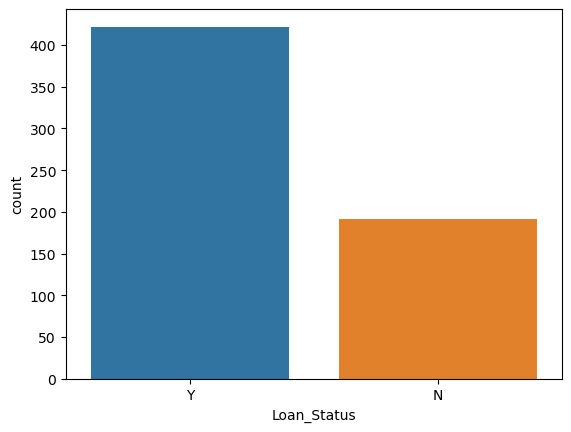

In [9]:
# Countplot Display distribution of data across all level of category
sns.countplot(df['Loan_Status'])

Findings--The loan count status has been approved for almost 422 people of 684 peoples.

<AxesSubplot:xlabel='Gender', ylabel='count'>

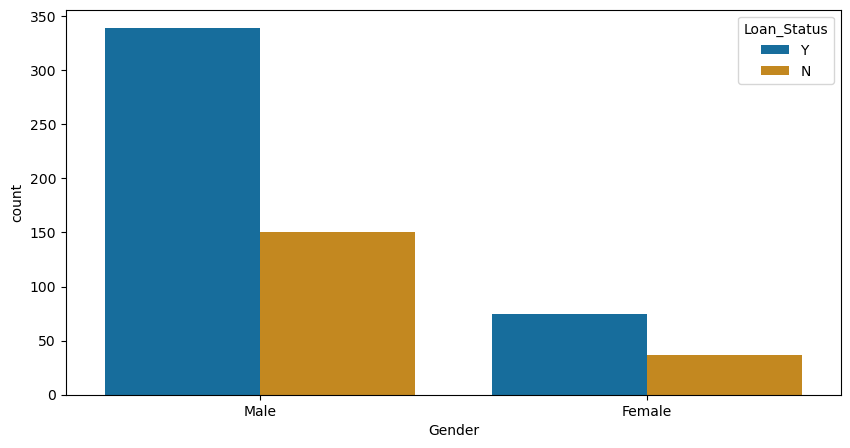

In [10]:
# Countplot Display distribution of data across all level of category
plt.subplots(figsize=(10,5))
sns.countplot(x='Gender',hue='Loan_Status',data=df,palette='colorblind')

Findings--The loan status approval rate is high for male candiate and also has 30% of rejection rate then the female candiate,the approval is half of the candiate applied for the loan.

<AxesSubplot:xlabel='Married', ylabel='count'>

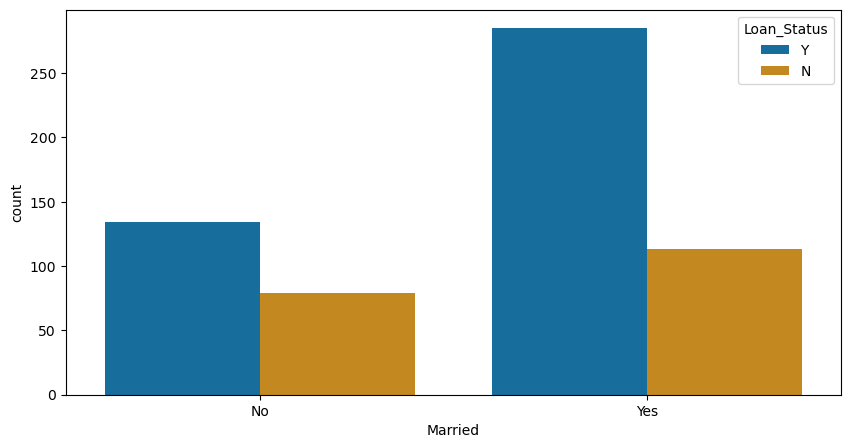

In [11]:
# Countplot Display distribution of data across all level of category
plt.subplots(figsize=(10,5))
sns.countplot(x='Married',hue='Loan_Status',data=df,palette='colorblind')

Findings--
1.The loan status approval rate is high for married candiate and also has 40% of rejection rate.
2.For unmarried candiate,the approval is low for the candiate applied for the loan.

<AxesSubplot:xlabel='Loan_Status', ylabel='Dependents'>

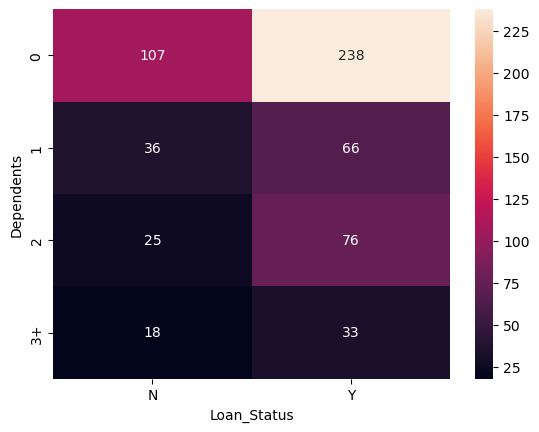

In [12]:
group=df.groupby(['Dependents','Loan_Status'])
Dependents_Loan_Status=group.size().unstack()
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(Dependents_Loan_Status, annot=True, fmt='d')

<AxesSubplot:xlabel='Education', ylabel='count'>

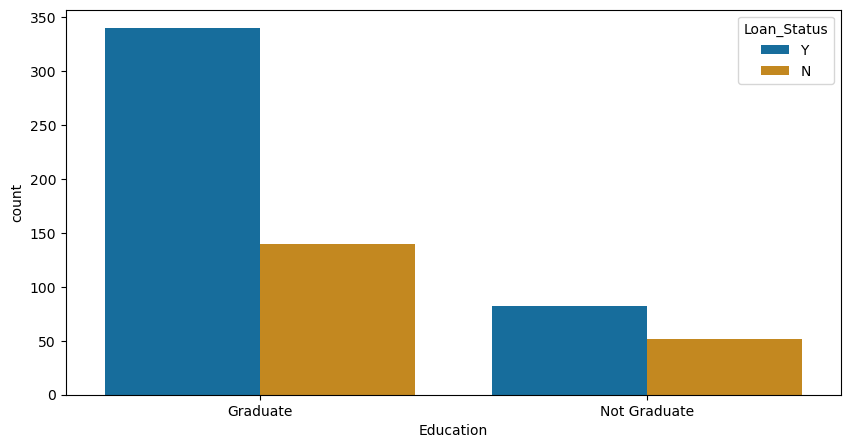

In [13]:
# Countplot Display distribution of data across all level of category
plt.subplots(figsize=(10,5))
sns.countplot(x='Education',hue='Loan_Status',data=df,palette='colorblind')

Findings--
1.The Graduated people has high chance of approval rate with 30% rejection rate.
2.The Not Graduated people has low chance of approval rate with more rejection.

<AxesSubplot:xlabel='Loan_Status', ylabel='Property_Area'>

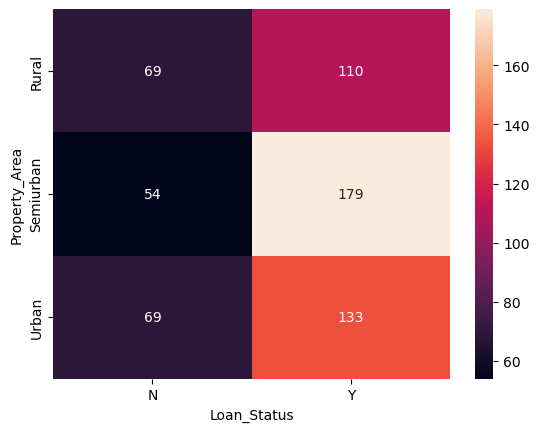

In [15]:
group=df.groupby(['Property_Area','Loan_Status'])
Property_Area_Loan_Status=group.size().unstack()
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(Property_Area_Loan_Status, annot=True, fmt='d')

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

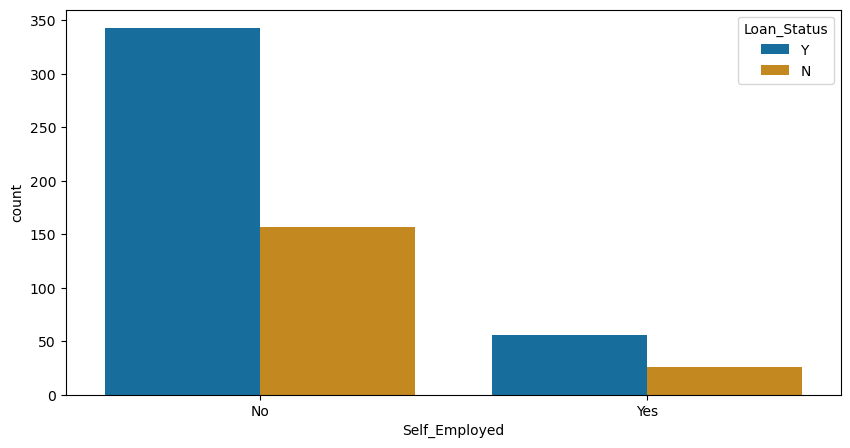

In [16]:
# Countplot Display distribution of data across all level of category
plt.subplots(figsize=(10,5))
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df,palette='colorblind')

Findings--The Self Employed candiate has more chance of loan rejection rate

<AxesSubplot:xlabel='Married', ylabel='ApplicantIncome'>

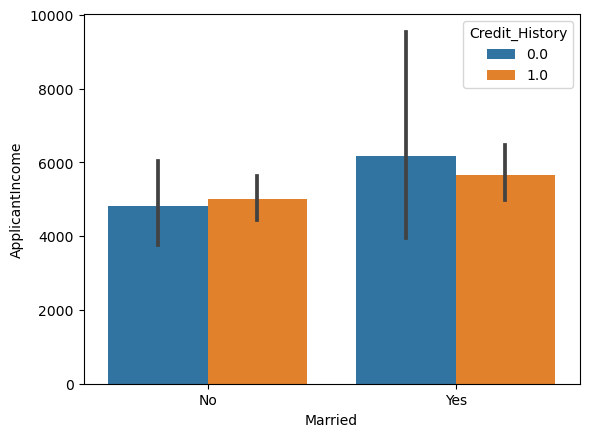

In [17]:
#barplot Display distribution of data across all level of category
sns.barplot(x='Married',y='ApplicantIncome',hue='Credit_History',data=df)

Findings--
1.The Average income is high for unmarried person but chance of approval rate is low when compared to unmarried person.The approval rate is high for unmarried person with less income.

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

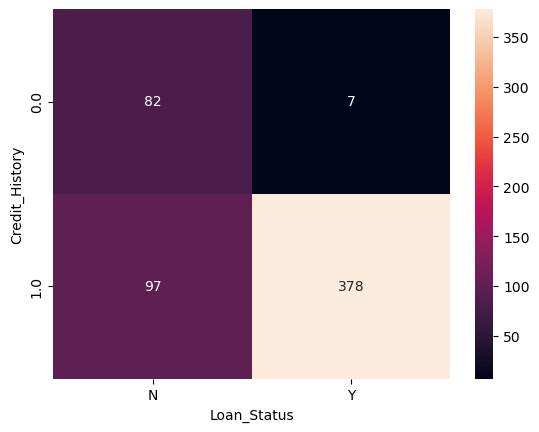

In [19]:
group=df.groupby(['Credit_History','Loan_Status'])
Credit_History_Loan_Status=group.size().unstack()
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(Credit_History_Loan_Status, annot=True, fmt='d')

Findings--
1.The chance of approval rate is high for person whose credit history is classified from section 1.
2.The chance of rejection rate of 90% whose credit history is classified from section 0.

Preprocessing the data

In [20]:
# Checking the datetypes
df .dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [21]:
# Checking for statstical summary
df.describe()  

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [22]:
#Check the null values in dataset
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

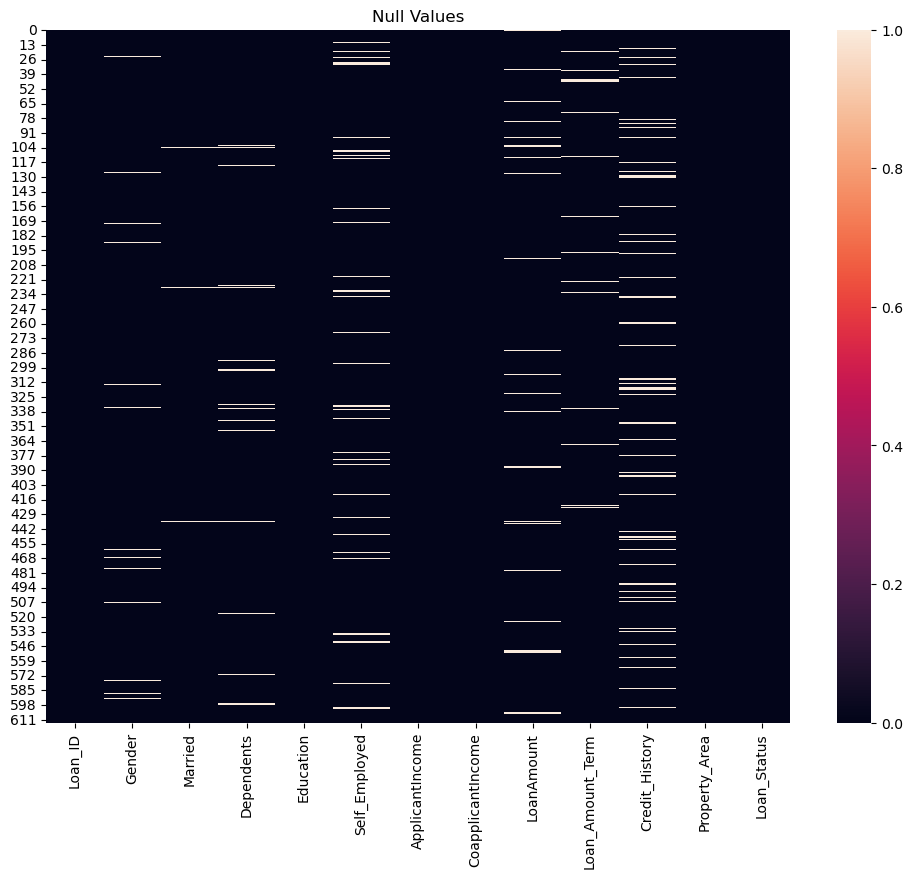

In [26]:
#Heatmap Display distribution of data across all level of category
plt.figure(figsize=(12,9))
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

In [27]:
#filling the missing values for numerical terms by mean
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [28]:
df.isnull().sum() 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
#filling the missing values for categorical terms by mode
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [32]:
df.isnull().sum()   

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

No null values in the dataset. 

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

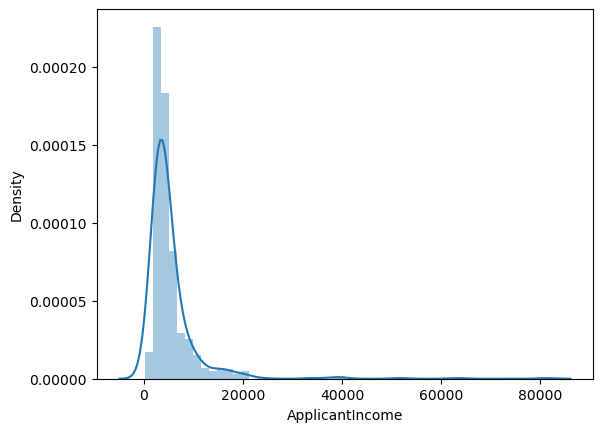

In [33]:
#Distplot Display distribution of data across all level of category
sns.distplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

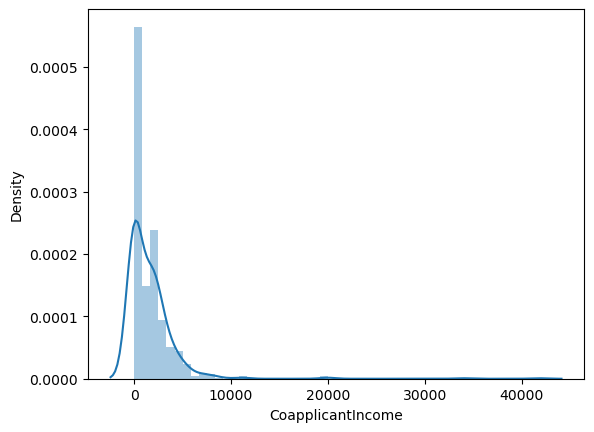

In [34]:
#Distplot Display distribution of data across all level of category
sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

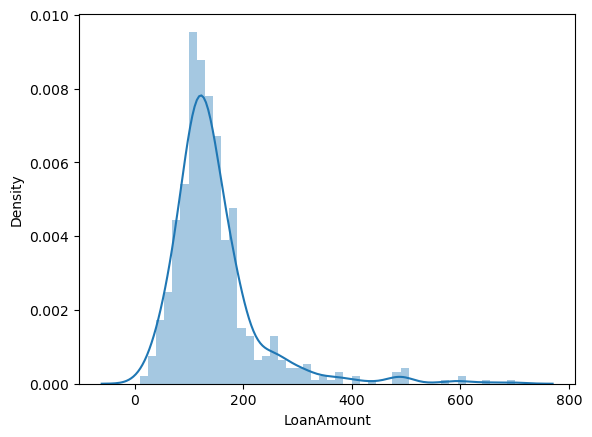

In [35]:
#Distplot Display distribution of data across all level of category
sns.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

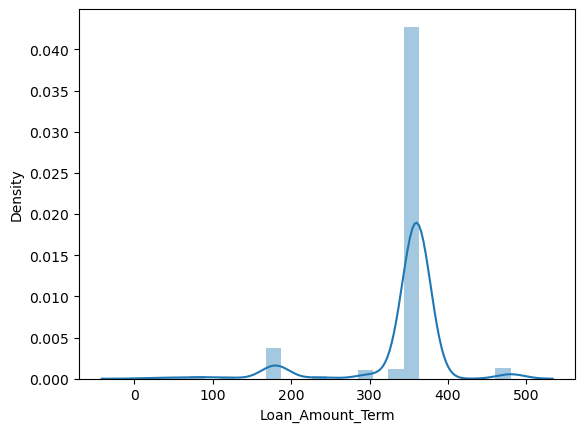

In [36]:
#Distplot Display distribution of data across all level of category
sns.distplot(df['Loan_Amount_Term'])

Findings-- Income,Loan amount and terms have skewness

Converting all Object datatype to Numerical datatype----> Using LabelEncoder Method.

In [37]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [38]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=l.fit_transform(df[i].values)

In [39]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [40]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


<AxesSubplot:>

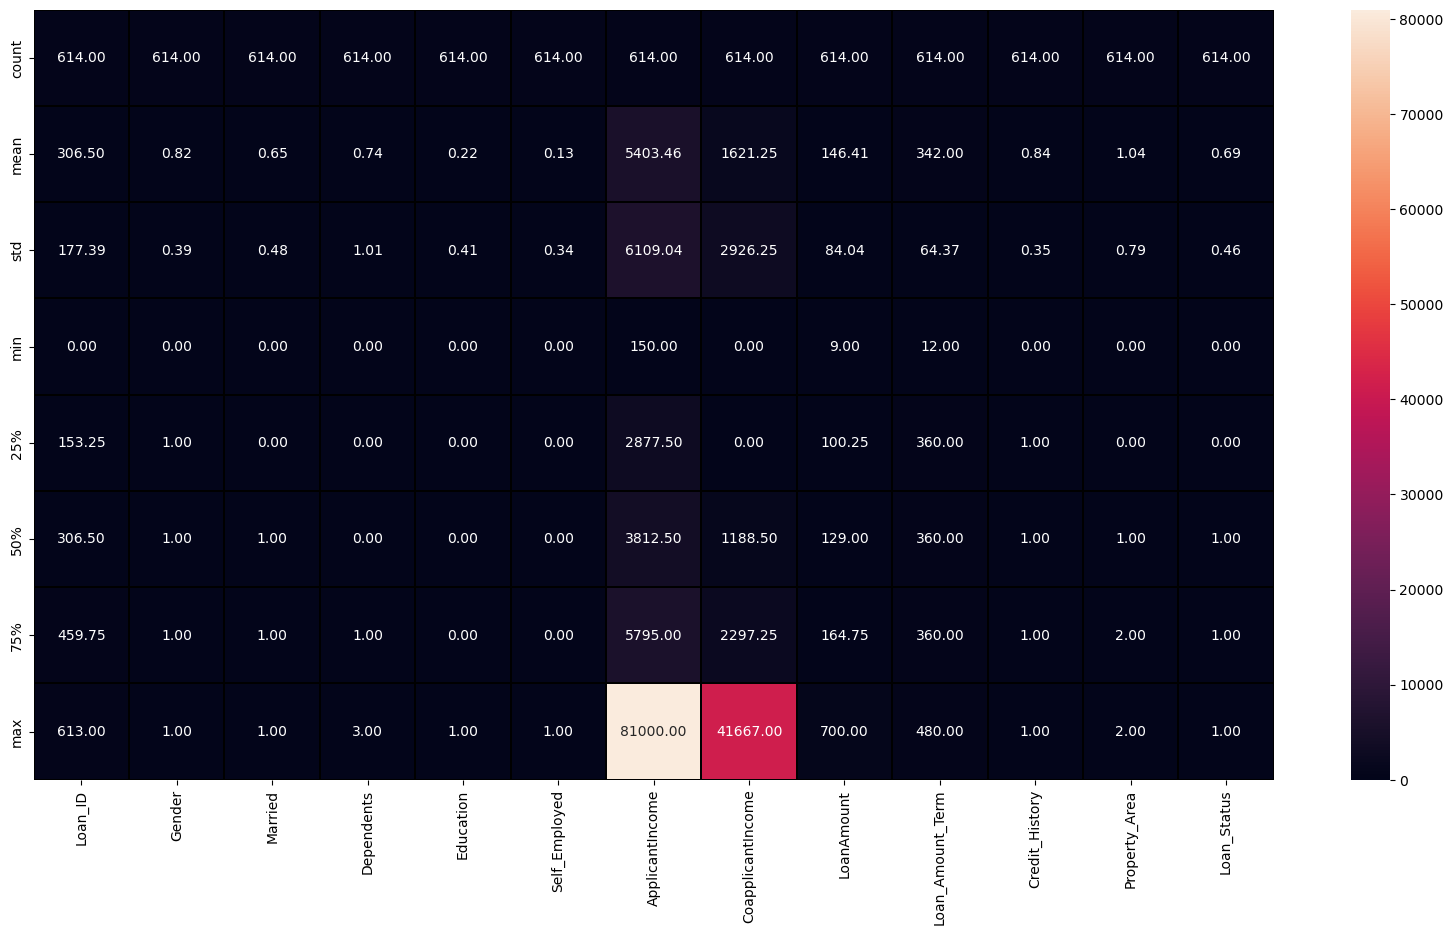

In [41]:
#Heatmap Display distribution of data across all level of category
plt.figure(figsize=(20,10))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

Correlation Matrix

In [42]:
dfcor=df.corr()
dfcor

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.035684,-0.028945,-0.032429,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.028945,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974


<AxesSubplot:>

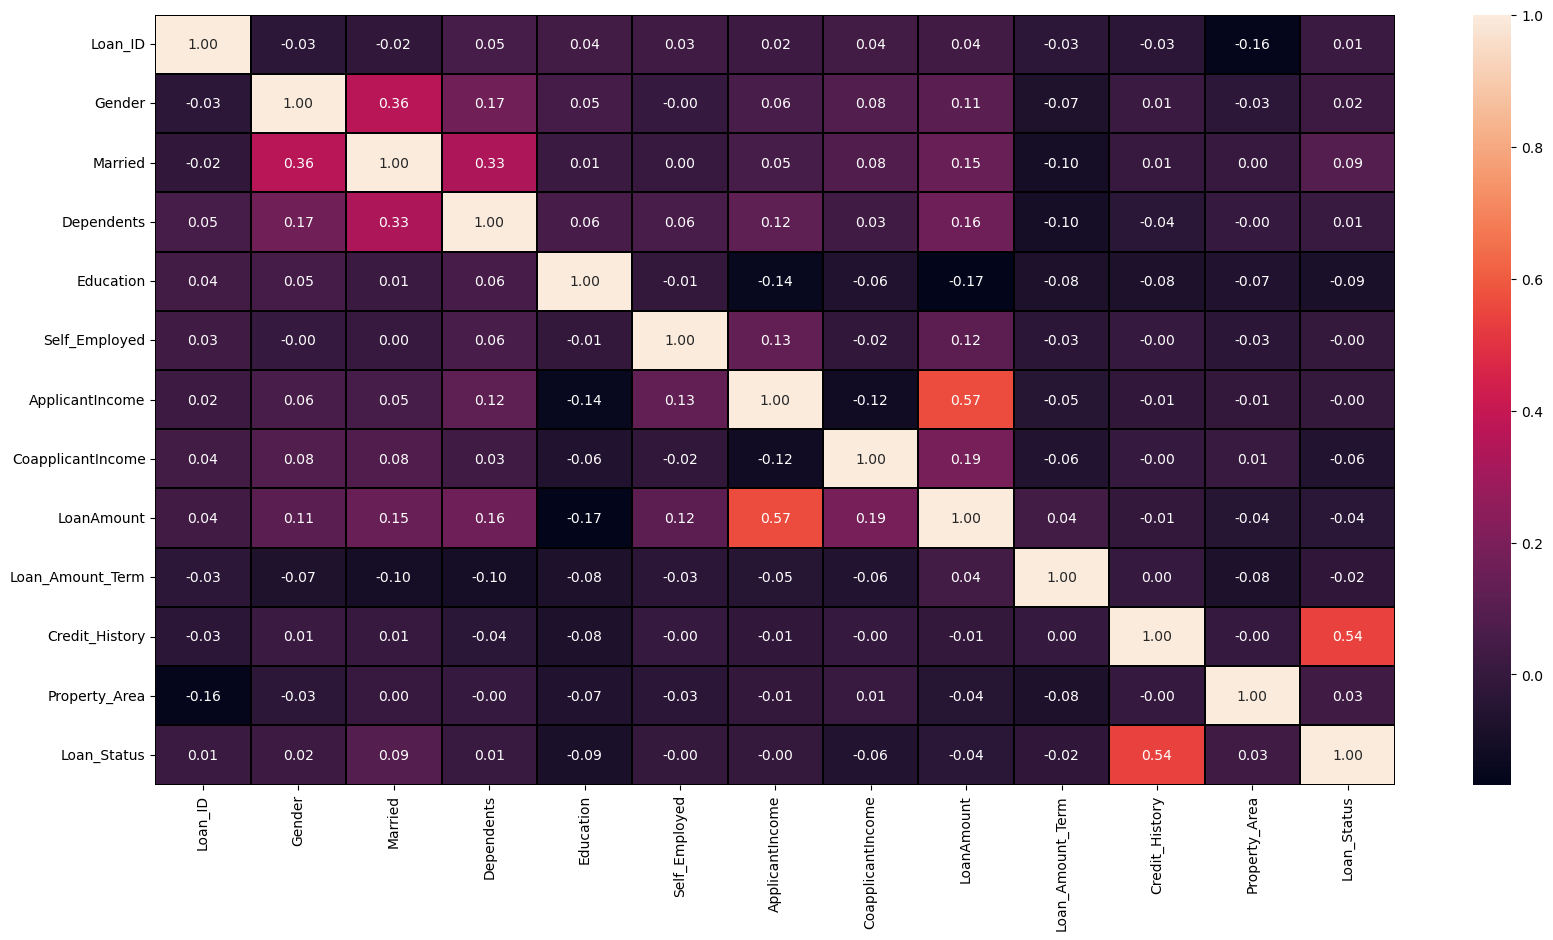

In [43]:
#Heatmap Display distribution of data across all level of category
plt.figure(figsize=(20,10))
sns.heatmap(dfcor,annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

Checking for outliers

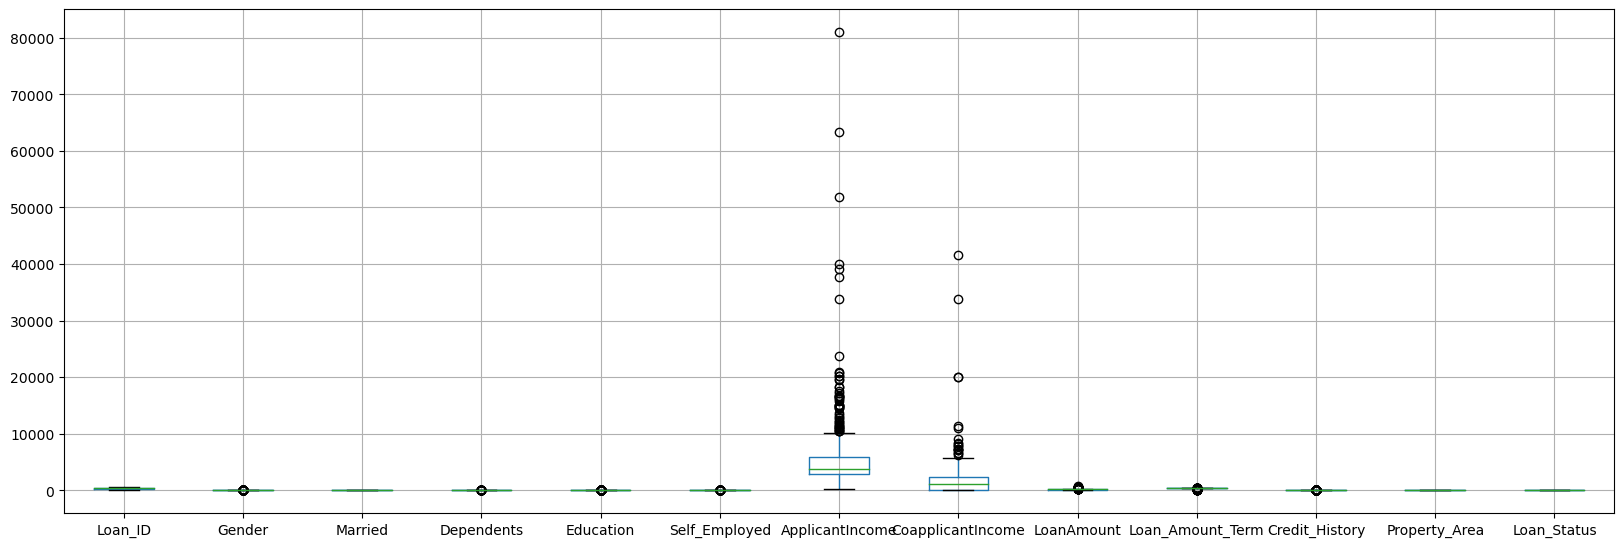

In [44]:
#Boxplot Display distribution of data across all level of category
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

Removing the outliers----> Using Z score method

In [49]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.729232,0.472343,1.372089,0.737806,0.528362,0.392601,0.072991,0.554487,0.000000,0.279851,0.451640,1.223298,0.674519
1,1.723590,0.472343,0.728816,0.253470,0.528362,0.392601,0.134412,0.038732,0.219273,0.279851,0.451640,1.318513,1.482537
2,1.717948,0.472343,0.728816,0.737806,0.528362,2.547117,0.393747,0.554487,0.957641,0.279851,0.451640,1.223298,0.674519
3,1.712307,0.472343,0.728816,0.737806,1.892641,0.392601,0.462062,0.251980,0.314547,0.279851,0.451640,1.223298,0.674519
4,1.706665,0.472343,1.372089,0.737806,0.528362,0.392601,0.097728,0.554487,0.064454,0.279851,0.451640,1.223298,0.674519
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.706665,2.117107,1.372089,0.737806,0.528362,0.392601,0.410130,0.554487,0.898095,0.279851,0.451640,1.318513,0.674519
610,1.712307,0.472343,0.728816,2.236021,0.528362,0.392601,0.212557,0.554487,1.267279,2.518655,0.451640,1.318513,0.674519
611,1.717948,0.472343,0.728816,0.253470,0.528362,0.392601,0.437174,0.472404,1.269371,0.279851,0.451640,1.223298,0.674519
612,1.723590,0.472343,0.728816,1.244745,0.528362,0.392601,0.357064,0.554487,0.483367,0.279851,0.451640,1.223298,0.674519


In [50]:
df_new=df[(z<3).all(axis=1)]
df_new.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [51]:
df.shape 

(614, 13)

In [52]:
df_new.shape 

(577, 13)

New shape of the dataset after removal of outliers

In [58]:
 # Check data loss in dataset after removal of outliers
Data_loss=((614-577)/614*100)                      
Data_loss

6.026058631921824

Ckecking distribution of Skewness

In [59]:
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Droping Loan Status column.

In [60]:
x= df.drop('Loan_Status',axis=1)
y= df['Loan_Status']

Handling Skewness using Power transform function.

In [61]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

In [64]:
df_new.skew()

Loan_ID             -0.287022
Gender              -1.648795
Married             -0.644850
Dependents           0.441404
Education            1.367622
Self_Employed        2.159796
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.024376
Loan_Amount_Term     0.389827
Credit_History      -1.599912
Property_Area       -0.158267
dtype: float64

In [65]:
x=df_new
x.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-2.156241,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.544331,-1.102837,0.235387,0.185905,0.514063,1.193567
1,-2.131291,0.472343,0.728816,0.854259,-0.528362,-0.392601,0.170974,0.750578,-0.037659,0.185905,0.514063,-1.350003
2,-2.109873,0.472343,0.728816,-0.827104,-0.528362,2.547117,-0.499955,-1.102837,-1.346305,0.185905,0.514063,1.193567
3,-2.090468,0.472343,0.728816,-0.827104,1.892641,-0.392601,-0.743873,0.891686,-0.167886,0.185905,0.514063,1.193567
4,-2.072435,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.582817,-1.102837,0.158610,0.185905,0.514063,1.193567


In [ ]:
Classification Model

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.7, random_state =i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is " ,maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8209302325581396  on Random_state  113


In [67]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .7, random_state = 113)

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8209302325581396
[[ 64  65]
 [ 12 289]]
              precision    recall  f1-score   support

           0       0.84      0.50      0.62       129
           1       0.82      0.96      0.88       301

    accuracy                           0.82       430
   macro avg       0.83      0.73      0.75       430
weighted avg       0.82      0.82      0.81       430



In [69]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))

0.6976744186046512
[[ 64  65]
 [ 65 236]]
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       129
           1       0.78      0.78      0.78       301

    accuracy                           0.70       430
   macro avg       0.64      0.64      0.64       430
weighted avg       0.70      0.70      0.70       430



In [70]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8
[[ 62  67]
 [ 19 282]]
              precision    recall  f1-score   support

           0       0.77      0.48      0.59       129
           1       0.81      0.94      0.87       301

    accuracy                           0.80       430
   macro avg       0.79      0.71      0.73       430
weighted avg       0.80      0.80      0.78       430



In [71]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)

ad_pred = svc.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8069767441860465
[[ 61  68]
 [ 15 286]]
              precision    recall  f1-score   support

           0       0.80      0.47      0.60       129
           1       0.81      0.95      0.87       301

    accuracy                           0.81       430
   macro avg       0.81      0.71      0.73       430
weighted avg       0.81      0.81      0.79       430



In [72]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR, x, y, cv=5)
print("cross validation score of LogisticRegression model:",scr.mean())

cross validation score of LogisticRegression model: 0.7997067839530854


In [73]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt, x, y, cv=5)
print("cross validation score of DecisionTree model:",scr.mean())

cross validation score of DecisionTree model: 0.66609356257497


In [74]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf, x, y, cv=5)
print("cross validation score of RandomForest model:",scr.mean())

cross validation score of RandomForest model: 0.7751699320271891


In [75]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(svc, x, y, cv=5)
print("cross validation score of SVC model:",scr.mean())

cross validation score of SVC model: 0.7980674396907904


In [76]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [77]:
from sklearn.model_selection import GridSearchCV
parameters = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
              'solver':['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
             'C':[1e-5,1e-4,1e-2,1e-1,1,10,100]}
             
GCV=GridSearchCV(LogisticRegression(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']})

In [78]:
GCV.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}

In [79]:
mod=LogisticRegression(C=0.1,penalty='l1',solver='saga',random_state=113)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

82.55813953488372


In [80]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score
X,y=load_breast_cancer(return_X_y=True)
clf=LogisticRegression(C=0.1,penalty='l1',solver='saga',random_state=113).fit(X,y)
roc_auc_score(y,clf.predict_proba(X)[:,1])
roc_auc_score(y,clf.decision_function(X))

0.9383092859785424

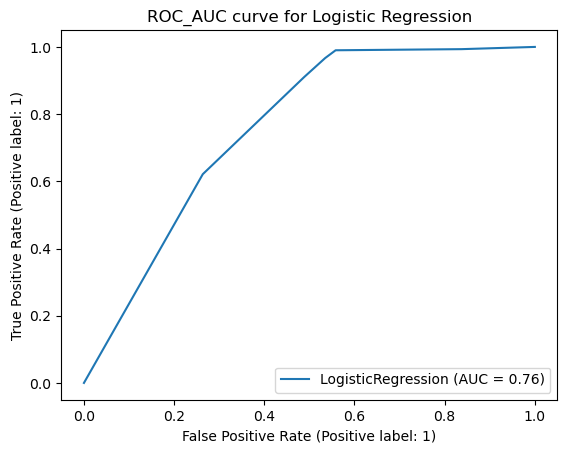

In [81]:
lr=LogisticRegression(C=0.1,penalty='l1',solver='saga',random_state=113)
lr.fit(x_train,y_train)
lr_disp=plot_roc_curve(lr,x_test,y_test)
plt.title('ROC_AUC curve for Logistic Regression')
plt.show()

In [82]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': np.arange(2, 15),
             'criterion':['gini','entropy']}
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [83]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 2}

In [84]:
mod=DecisionTreeClassifier(criterion='entropy',max_depth=2,random_state=113)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

82.55813953488372


In [85]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score
X,y=load_breast_cancer(return_X_y=True)
clf1=DecisionTreeClassifier(criterion='entropy',max_depth=2,random_state=113).fit(X,y)
roc_auc_score(y,clf1.predict_proba(X)[:,1])

0.9751466624385603

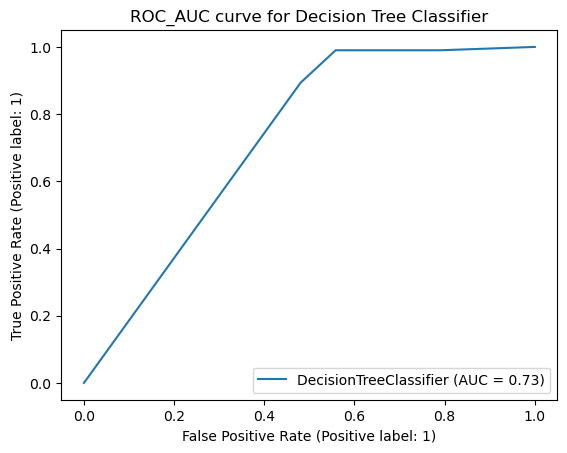

In [86]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=2,random_state=113)
dt.fit(x_train,y_train)
dt_disp=plot_roc_curve(dt,x_test,y_test)
plt.title('ROC_AUC curve for Decision Tree Classifier')
plt.show()

In [87]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_features': ['auto','sqrt','log2']}
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2']})

In [88]:
GCV.best_params_

{'max_features': 'sqrt'}

In [89]:
mod=RandomForestClassifier(max_features='auto',random_state=113)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

80.23255813953489


In [90]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score
X,y=load_breast_cancer(return_X_y=True)
clf2=RandomForestClassifier(max_features='auto',random_state=113).fit(X,y)
roc_auc_score(y,clf2.predict_proba(X)[:,1])

0.9999999999999999

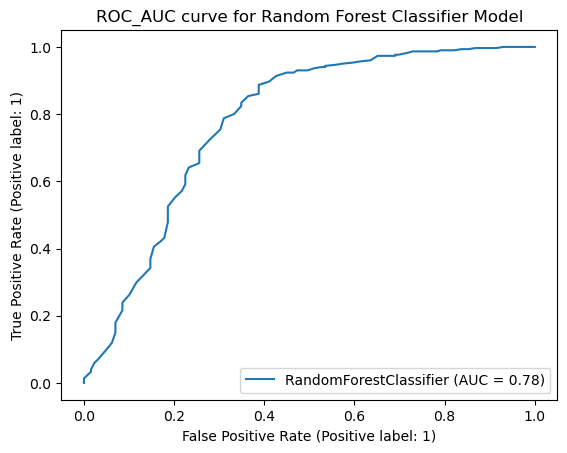

In [91]:
rf=RandomForestClassifier(max_features='auto',random_state=113)
rf.fit(x_train,y_train)
rf_disp=plot_roc_curve(rf,x_test,y_test)
plt.title('ROC_AUC curve for Random Forest Classifier Model')
plt.show()

In [92]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf']}
GCV=GridSearchCV(SVC(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [93]:
GCV.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [94]:
mod=SVC(C=1,gamma=0.01,kernel='rbf',random_state=113)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

82.09302325581396


In [95]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score
X,y=load_breast_cancer(return_X_y=True)
clf2=SVC(C=1,gamma=0.01,kernel='rbf',random_state=113).fit(X,y)
roc_auc_score(y,clf2.predict(X))

1.0

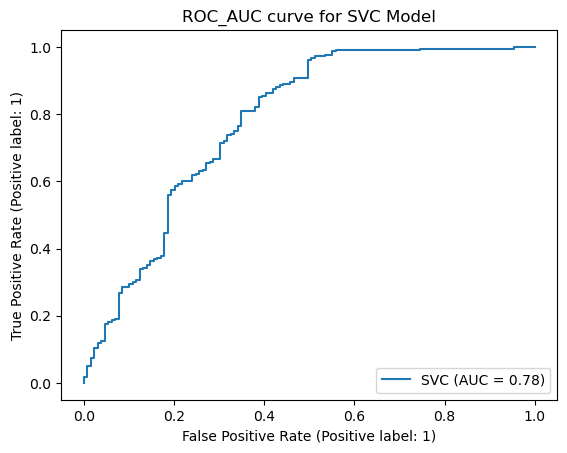

In [96]:
svc=SVC(C=1,gamma=0.01,kernel='rbf',random_state=113)
svc.fit(x_train,y_train)
svc_disp=plot_roc_curve(svc,x_test,y_test)
plt.title('ROC_AUC curve for SVC Model')
plt.show()

,Y Test,Prediction
557,1,1
564,0,0
175,1,1
41,1,1
248,1,1


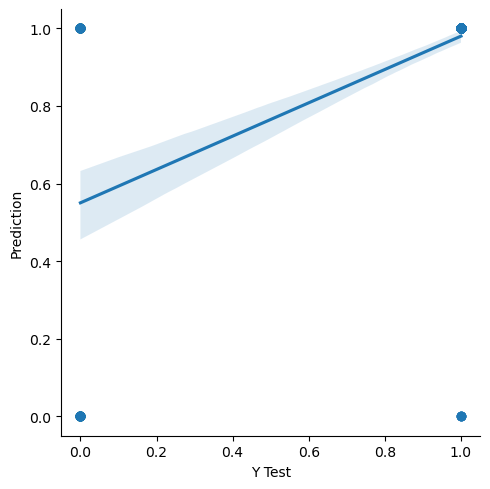

In [97]:
data=pd.DataFrame({'Y Test':y_test , 'Prediction':pred},columns=['Y Test','Prediction'])
sns.lmplot(x='Y Test',y='Prediction',data=data,palette='rainbow')
data.head()

In [98]:
import joblib
joblib.dump(mod,"loan application status prediction.pkl")

['loan application status prediction.pkl']

In [ ]:
model=joblib.load("loan application status prediction.pkl")
prediction=model.predict(x_test)
print(accuracy_score(y_test,prediction)*100)

In [ ]:
prediction=pd.DataFrame(prediction)  # Converting into Data Frame
prediction.to_csv('Results of loan application status prediction.csv')
prediction.head()

Thank you.